In [1]:
# Test imports
import sys
sys.path.append('/home/andrei/Desktop/PhD/Carepath')

from clean_ndes import *
from clean_ndes import *

print("✓ Package imported successfully!")
print(f"Config: N={N_TRAJECTORIES}, T={T_TIME_STEPS}, D={D_DIMENSIONS}")

✓ Package imported successfully!
Config: N=1000, T=183, D=7


In [2]:
import numpy as np

# Generate synthetic data
np.random.seed(SEED)
data, adherence_dropped_at = generate_synthetic_data_super_simple(
    N_TRAJECTORIES, T_TIME_STEPS, D_DIMENSIONS
)

print(f"✓ Data generated: shape={data.shape}")
print(f"  Adherence drops: {len(adherence_dropped_at)}")

✓ Data generated: shape=(1000, 183, 7)
  Adherence drops: 90542


In [3]:
# Create model
model = AdherencePredictor(in_dim=INPUT_DIM, out_dim=OUTPUT_DIM)

# Test forward pass
import torch
dummy_input = torch.randn(7)
logits = model(dummy_input)
print(f"✓ Model forward: input shape={dummy_input.shape}, output shape={logits.shape}")

# Test inference
prediction = model.inference(dummy_input)
print(f"✓ Model inference: predicted class={prediction.item()}")

✓ Model forward: input shape=torch.Size([7]), output shape=torch.Size([2])
✓ Model inference: predicted class=0


In [4]:
from torch.utils.data import DataLoader

# Test intra-trajectory dataset
dataset_intra = SampledLength2AdherenceDataset(data)
X, Y = dataset_intra[0]
print(f"✓ Intra dataset: sample shapes X={X.shape}, Y={Y.shape}")

# Test inter-trajectory dataset  
dataset_inter = AdherenceDataset(data)
X, Y = dataset_inter[0]
print(f"✓ Inter dataset: sample shapes X={X.shape}, Y={Y.shape}")

✓ Intra dataset: sample shapes X=torch.Size([2, 6]), Y=torch.Size([2])
✓ Inter dataset: sample shapes X=torch.Size([183, 6]), Y=torch.Size([183])


In [5]:
# Create dummy data
batch_size, T, n_classes = 5, 10, 2
outputs = torch.randn(batch_size, T, n_classes)
labels = torch.randint(0, n_classes, (batch_size, T))

# Test losses
train_loss = get_batch_loss(outputs, labels)
val_loss = get_batch_loss_validation(outputs, labels)

print(f"✓ Train loss: {train_loss.item():.4f}")
print(f"✓ Val loss: {val_loss.item():.4f}")

✓ Train loss: 0.9249
✓ Val loss: 1.5809


In [6]:
from torch.utils.data import random_split

# Setup small dataset
N_test, T_test = 100, 10
data_test, _ = generate_synthetic_data_super_simple(N_test, T_test, D_DIMENSIONS)
dataset_test = SampledLength2AdherenceDataset(data_test)

train_size = int(0.8 * len(dataset_test))
val_size = len(dataset_test) - train_size
train_set, val_set = random_split(dataset_test, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=10, shuffle=True)
val_loader = DataLoader(val_set, batch_size=10, shuffle=False)

# Train model
model = AdherencePredictor(in_dim=INPUT_DIM, out_dim=OUTPUT_DIM)
train_losses, val_losses = train_one_epoch(
    model, train_loader, val_loader, learning_rate=0.001, verbose=False
)

print(f"✓ Training complete: {len(train_losses)} batches")
print(f"  Final train loss: {train_losses[-1]:.4f}")
print(f"  Final val loss: {val_losses[-1]:.4f}")

✓ Training complete: 72 batches
  Final train loss: 0.1628
  Final val loss: 0.0000


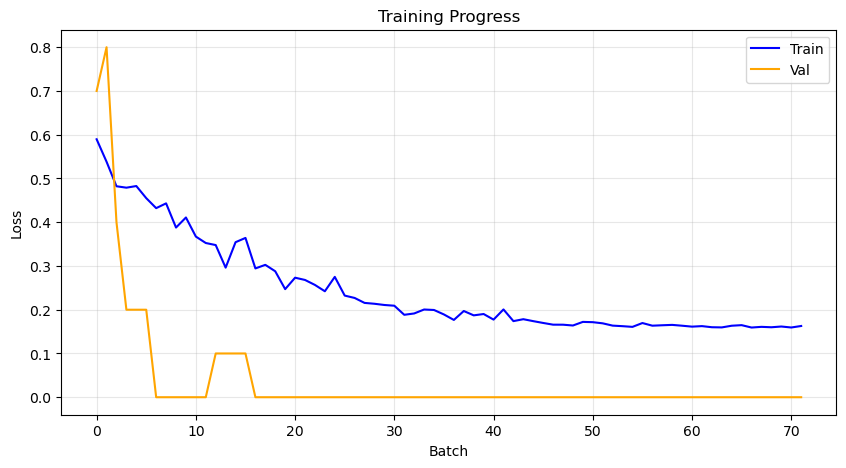

✓ Visualization complete!


In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train', color='blue')
plt.plot(val_losses, label='Val', color='orange')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Progress')
plt.grid(True, alpha=0.3)
plt.show()

print("✓ Visualization complete!")

### comparison inter intra sampling 

Adherence Prediction: Intra vs Inter-trajectory Sampling Comparison

Generating synthetic data:
  N trajectories: 1000
  T time steps: 183
  D dimensions: 7
  Adherence drops: 90542

--------------------------------------------------------------------------------
INTRA-TRAJECTORY SAMPLING
--------------------------------------------------------------------------------
Intra-trajectory sampling:
  Training set size: 800
  Validation set size: 200
Batch 0: val_loss = 0.6500
Batch 0: train_loss = 0.5133
Batch 1: val_loss = 0.5000
Batch 1: train_loss = 0.4894
Batch 2: val_loss = 0.4500
Batch 2: train_loss = 0.4652
Batch 3: val_loss = 0.4000
Batch 3: train_loss = 0.4744
Batch 4: val_loss = 0.3000
Batch 4: train_loss = 0.4107
Batch 5: val_loss = 0.3000
Batch 5: train_loss = 0.4117
Batch 6: val_loss = 0.2000
Batch 6: train_loss = 0.4133
Batch 7: val_loss = 0.2000
Batch 7: train_loss = 0.3915
Batch 8: val_loss = 0.2000
Batch 8: train_loss = 0.3643
Batch 9: val_loss = 0.1500
Batch 9: train_loss

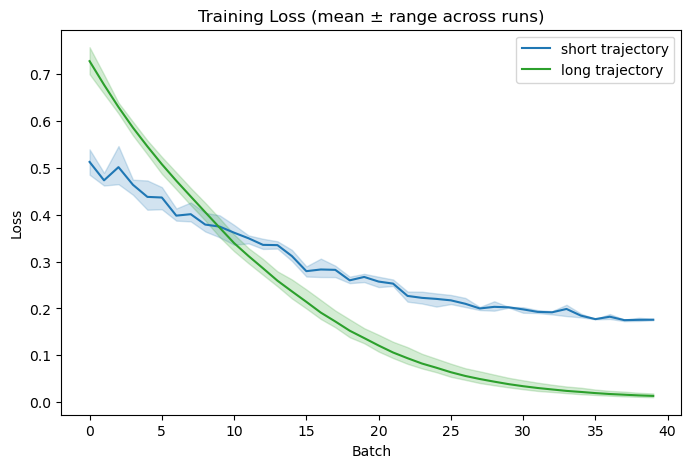

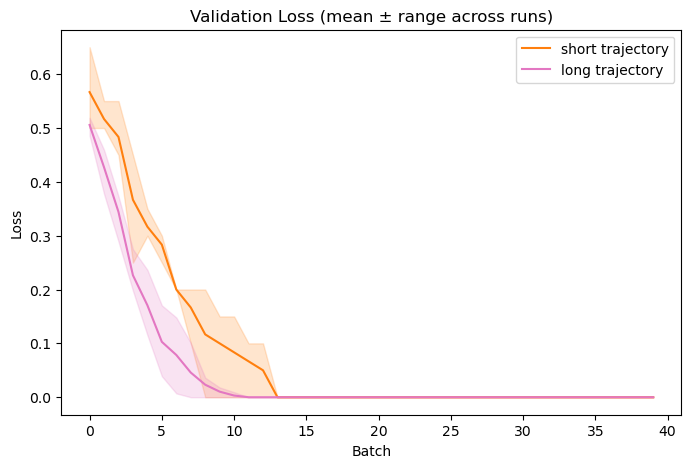


Experiment completed!


In [8]:
import sys
sys.path.append('/home/andrei/Desktop/PhD/Carepath')

from clean_ndes.main import main
main()

In [12]:
# Setup imports
# import sys
# sys.path.append('/home/andrei/Desktop/PhD/Carepath')  # parent of clean_ndes

import torch
import numpy as np
import matplotlib.pyplot as plt

from clean_ndes.config import (
    N_TRAJECTORIES, T_TIME_STEPS, D_DIMENSIONS,
    BATCH_SIZE, LEARNING_RATE, SEED
)
from clean_ndes.data_generation import generate_synthetic_data_super_simple
from clean_ndes.datasets import AdherenceDataset
from clean_ndes.model import AdherencePredictor
from clean_ndes.training import train_one_epoch
from torch.utils.data import random_split, DataLoader

# Reproducibility
np.random.seed(SEED)
torch.manual_seed(SEED)


# 1) Generate dataset
N, T, D = N_TRAJECTORIES, T_TIME_STEPS, D_DIMENSIONS
data, adherence_dropped_at = generate_synthetic_data_super_simple(N, T, D)
dataset = AdhereenceDatast(data)

# 2) 80/20 train-val split
dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size
train_set, val_set = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False)

# 3) Create model and train for one epoch (collect per-batch losses)
model = AdherencePredictor(in_dim=D, out_dim=2)  # D includes adherence + controls
train_losses, val_losses = train_one_epoch(
    model, train_loader, val_loader, learning_rate=LEARNING_RATE, verbose=False
)

# 4) Plot convergence curves
plt.figure(figsize=(9, 5))
plt.plot(train_losses, label='Train', color='tab:blue')
plt.plot(val_losses, label='Validation', color='tab:orange')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (one epoch)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5) Plot a sample inference using one trajectory from the validation set
#    - pick a single sample from the underlying dataset via the Subset indices
val_indices = val_set.indices if hasattr(val_set, 'indices') else range(len(val_set))
sample_idx = val_indices[0]

X_val, Y_val = dataset[sample_idx]         # X_val: (T, D-1) controls, Y_val: (T,) adherence
T_sample = Y_val.shape[0]
ts = torch.arange(1, T_sample + 1)

# initial state y0 = [adherence_t0, controls_t0]
y0 = torch.cat([Y_val[0].unsqueeze(0), X_val[0]])

# roll out predicted trajectory
with torch.no_grad():
    traj_pred = model.solve_for_inference(ts=ts, cs=X_val, y0=y0)  # (T, D)
    y_pred = traj_pred[:, 0].long().cpu().numpy()                  # predicted adherence classes
    y_true = Y_val.long().cpu().numpy()



NameError: name 'AdhereenceDatast' is not defined

# Benchmark on real adherence dataset

## Dyads

In [1]:
import pandas as pd
import numpy as np

# Load the steps.csv file
steps_path = "/home/andrei/Desktop/PhD/Carepath/data_for_simulations/Dyads/steps.csv"
df = pd.read_csv(steps_path)

# Filter for Patients group only
df_patients = df[df['Group'] == 'Patients'].copy()

# Convert to numeric
df_patients['DaysFromTransplant'] = pd.to_numeric(df_patients['DaysFromTransplant'], errors='coerce')
df_patients['steps'] = pd.to_numeric(df_patients['steps'], errors='coerce')

# Remove rows with missing values
df_patients = df_patients.dropna(subset=['DaysFromTransplant', 'steps', 'STUDY_PRTCPT_ID'])

# Aggregate steps per day per patient (sum all measurements in a day)
daily_steps = df_patients.groupby(['DaysFromTransplant', 'STUDY_PRTCPT_ID'])['steps'].sum().reset_index()

# Get unique days and patients, sorted
unique_days = sorted(daily_steps['DaysFromTransplant'].unique())
unique_patients = sorted(daily_steps['STUDY_PRTCPT_ID'].unique())

n_days = len(unique_days)
n_patients = len(unique_patients)

print(f"Found {n_days} unique days (range: {min(unique_days)} to {max(unique_days)})")
print(f"Found {n_patients} unique patients")

# Create mapping dictionaries for efficient lookup
day_to_idx = {day: idx for idx, day in enumerate(unique_days)}
patient_to_idx = {patient: idx for idx, patient in enumerate(unique_patients)}

# Initialize array with zeros (missing data will be 0)
arr = np.zeros((n_days, n_patients, 1), dtype=np.float32)

# Fill the array
for _, row in daily_steps.iterrows():
    day_idx = day_to_idx[row['DaysFromTransplant']]
    patient_idx = patient_to_idx[row['STUDY_PRTCPT_ID']]
    arr[day_idx, patient_idx, 0] = row['steps']

print(f"\nArray shape: {arr.shape}")
print(f"Array dtype: {arr.dtype}")
print(f"Total non-zero entries: {(arr != 0).sum()}")
print(f"Min value: {arr[arr > 0].min() if (arr > 0).any() else 0}")
print(f"Max value: {arr.max()}")


Found 121 unique days (range: 0 to 120)
Found 143 unique patients

Array shape: (121, 143, 1)
Array dtype: float32
Total non-zero entries: 10788
Min value: 2.0
Max value: 40658.0


In [2]:
# Verify the array structure
print(f"Shape: {arr.shape} (n_days={arr.shape[0]}, n_patients={arr.shape[1]}, n_features={arr.shape[2]})")
print(f"\nExample: steps for patient {unique_patients[0]} on day {unique_days[0]}: {arr[0, 0, 0]}")
print(f"Example: steps for patient {unique_patients[0]} on day {unique_days[1]}: {arr[1, 0, 0] if len(unique_days) > 1 else 'N/A'}")

# The array is now ready to use: arr[day_index, patient_index, 0] gives the total steps
# for that patient on that day

Shape: (121, 143, 1) (n_days=121, n_patients=143, n_features=1)

Example: steps for patient P001 on day 0: 343.0
Example: steps for patient P001 on day 1: 310.0


In [3]:
# double check agent output

subset = df_patients[
    (df_patients['STUDY_PRTCPT_ID'] == 'P001') &
    (df_patients['Group'] == 'Patients') &
    (df_patients['DaysFromTransplant'] == 0)
]

print(f"Sum of 'steps' in the subset: {subset['steps'].sum()}")

Sum of 'steps' in the subset: 343


In [4]:
# Transform steps array to format expected by clean_ndes: (N, T, D)
# where N=patients, T=days, D=dimensions
# Since we only have steps as target (no control variables), we'll:
# 1. Convert steps to binary classification (high vs low steps)
# 2. Add a dummy control variable (all zeros) since the model requires at least one control

# Transpose from (n_days, n_patients, 1) to (n_patients, n_days, 1)
steps_data = arr.transpose(1, 0, 2)  # (143, 121, 1)

print(f"Transposed shape: {steps_data.shape} (patients, days, features)")

# Extract steps values (remove the last dimension)
steps_values = steps_data[:, :, 0]  # (143, 121)
print(f"Steps statistics: min={steps_values[steps_values > 0].min():.1f}, max={steps_values.max():.1f}, median={np.median(steps_values[steps_values > 0]):.1f}")



# Convert steps to binary classification target
# Use median as threshold: target = 1 if steps >= median, else 0
steps_median = np.median(steps_values[steps_values > 0])  # Median of non-zero steps
steps_target = (steps_values >= steps_median).astype(np.float32)
steps_target[steps_values == 0] = 0  # Zero steps = class 0

print(f"Steps median (threshold): {steps_median:.2f}")
print(f"Steps statistics: min={steps_values[steps_values>0].min():.1f}, max={steps_values.max():.1f}, median={steps_median:.1f}")
print(f"Target class 1: {steps_target.sum()} out of {steps_target.size} total ({steps_target.sum()/steps_target.size*100:.1f}%)")

# Create dummy control variable (all zeros) since model requires at least one control
# The model architecture expects controls, so we provide a dummy one
dummy_control = np.zeros_like(steps_target)

# Combine into final data array: (N, T, D)
# D = 2: target (steps as binary) + 1 dumy contrmol
D = 2
data = np.zeros((steps_data.shape[0], steps_data.shape[1], D), dtype=np.float32)

data[:, :, 0] = steps_target  # Target: steps (binary classification)
data[:, :, 1] = dummy_control  # Dummy control (all zeros)

print(f"\nFinal data shape: {data.shape} (patients, days, dimensions)")
print(f"Dimension 0: Steps target (binary: 0=low steps, 1=high steps)")
print(f"Dimension 1: Dummy control (all zeros - no actual controls)")
print(f"\nData statistics:")
print(f"  Target: min={data[:,:,0].min()}, max={data[:,:,0].max()}, mean={data[:,:,0].mean():.3f}")
print(f"  Control: min={data[:,:,1].min()}, max={data[:,:,1].max()}, mean={data[:,:,1].mean():.3f}")


Transposed shape: (143, 121, 1) (patients, days, features)
Steps statistics: min=2.0, max=40658.0, median=2440.0
Steps median (threshold): 2440.00
Steps statistics: min=2.0, max=40658.0, median=2440.0
Target class 1: 5395.0 out of 17303 total (31.2%)

Final data shape: (143, 121, 2) (patients, days, dimensions)
Dimension 0: Steps target (binary: 0=low steps, 1=high steps)
Dimension 1: Dummy control (all zeros - no actual controls)

Data statistics:
  Target: min=0.0, max=1.0, mean=0.312
  Control: min=0.0, max=0.0, mean=0.000


In [5]:
# Train NDE model on steps data using clean_ndes functionality
import sys
sys.path.append('/home/andrei/Desktop/PhD/Carepath')

import torch
from torch.utils.data import DataLoader, random_split
from clean_ndes.datasets import AdherenceDataset
from clean_ndes.model import AdherencePredictor
from clean_ndes.training import train_one_epoch
from clean_ndes.config import SEED, LEARNING_RATE, BATCH_SIZE

# Set random seeds for reproducibility
np.random.seed(SEED)
torch.manual_seed(SEED)

# Create dataset
# AdherenceDataset expects data shape (N, T, D) where:
# - data[..., 0] is target (steps as binary classification)
# - data[..., 1:] are control variables (dummy in our case)
dataset = AdherenceDataset(data)

# TODO: input batch size

print("BATCH_SIZE", BATCH_SIZE)

print(f"Dataset size: {len(dataset)} patients")
print(f"Sample shape - X (controls): {dataset[0][0].shape}, Y (target): {dataset[0][1].shape}")

# Split into train and validation (80/20)
dataset_size = len(dataset)
train_size = int(0.8 * dataset_size)
val_size = dataset_size - train_size
train_set, val_set = random_split(dataset, [train_size, val_size], 
                                   generator=torch.Generator().manual_seed(SEED))

print(f"Train set: {train_size} patients")
print(f"Validation set: {val_size} patients")

# Create data loaders
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False)

# Create model
# INPUT_DIM = D (total dimensions: target + controls)
# OUTPUT_DIM = 2 (binary classification: low steps=0, high steps=1)
INPUT_DIM = data.shape[2]  # D = 2 (target + 1 dummy control)
OUTPUT_DIM = 2  # Binary classification

model = AdherencePredictor(in_dim=INPUT_DIM, out_dim=OUTPUT_DIM, hidden_dim=64)

print(f"\nModel created:")
print(f"  Input dim: {INPUT_DIM} (target + dummy control)")
print(f"  Output dim: {OUTPUT_DIM} (binary: low steps=0, high steps=1)")
print(f"  Parameters: {sum(p.numel() for p in model.parameters())}")


BATCH_SIZE 20
Dataset size: 143 patients
Sample shape - X (controls): torch.Size([121, 1]), Y (target): torch.Size([121])
Train set: 114 patients
Validation set: 29 patients

Model created:
  Input dim: 2 (target + dummy control)
  Output dim: 2 (binary: low steps=0, high steps=1)
  Parameters: 8642


In [6]:
# Train the model for multiple epochs (10 epochs)
print("=" * 80)
print("Training NDE model on steps data (target only, no controls)")
print("=" * 80)

EPOCHS = 10
all_train_losses = []
all_val_losses = []

for epoch in range(1, EPOCHS + 1):
    train_losses, val_losses = train_one_epoch(
        model, 
        train_loader, 
        val_loader, 
        learning_rate=LEARNING_RATE,
        verbose=True
    )
    all_train_losses.extend(train_losses)
    all_val_losses.extend(val_losses)
    print(f"Epoch {epoch}/{EPOCHS} complete.")
    print(f"  Last train loss: {train_losses[-1]:.4f}")
    print(f"  Last val loss: {val_losses[-1]:.4f}")

print(f"\nTraining complete after {EPOCHS} epochs!")
print(f"  Final train loss: {all_train_losses[-1]:.4f}")
print(f"  Final val loss: {all_val_losses[-1]:.4f}")
print(f"  Total batches: {len(all_train_losses)}")

# For later code compatibility with single-epoch version:
train_losses = all_train_losses
val_losses = all_val_losses


Training NDE model on steps data (target only, no controls)
Batch 0: val_loss = 0.4194
Batch 0: train_loss = 0.6842
Batch 1: val_loss = 0.4194
Batch 1: train_loss = 0.6898
Batch 2: val_loss = 0.4194
Batch 2: train_loss = 0.6651
Batch 3: val_loss = 0.4194
Batch 3: train_loss = 0.6559
Batch 4: val_loss = 0.4194
Batch 4: train_loss = 0.6716
Batch 5: val_loss = 0.4194
Batch 5: train_loss = 0.6545
Epoch 1/10 complete.
  Last train loss: 0.6545
  Last val loss: 0.4194
Batch 0: val_loss = 0.3246
Batch 0: train_loss = 0.6439
Batch 1: val_loss = 0.3246
Batch 1: train_loss = 0.6529
Batch 2: val_loss = 0.3246
Batch 2: train_loss = 0.6140
Batch 3: val_loss = 0.3246
Batch 3: train_loss = 0.6060
Batch 4: val_loss = 0.3246
Batch 4: train_loss = 0.6088
Batch 5: val_loss = 0.3246
Batch 5: train_loss = 0.6278
Epoch 2/10 complete.
  Last train loss: 0.6278
  Last val loss: 0.3246
Batch 0: val_loss = 0.4194
Batch 0: train_loss = 0.6726
Batch 1: val_loss = 0.4194
Batch 1: train_loss = 0.6396
Batch 2: val_l

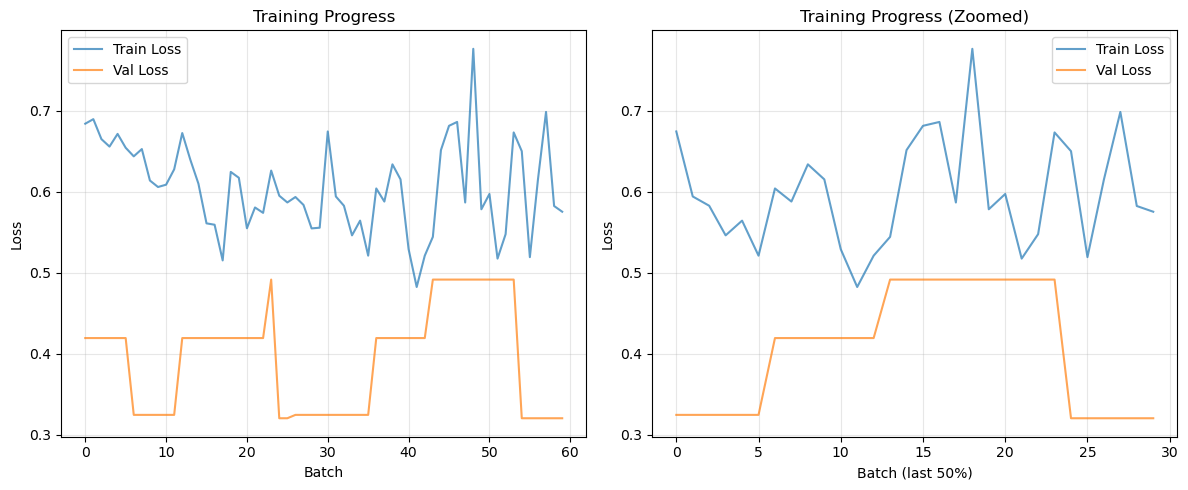

✓ Visualization complete!


In [7]:
# Plot training curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', color='tab:blue', alpha=0.7)
plt.plot(val_losses, label='Val Loss', color='tab:orange', alpha=0.7)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training Progress')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Plot last 50% of batches to see convergence better
start_idx = len(train_losses) // 2
plt.plot(train_losses[start_idx:], label='Train Loss', color='tab:blue', alpha=0.7)
plt.plot(val_losses[start_idx:], label='Val Loss', color='tab:orange', alpha=0.7)
plt.xlabel('Batch (last 50%)')
plt.ylabel('Loss')
plt.title('Training Progress (Zoomed)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualization complete!")


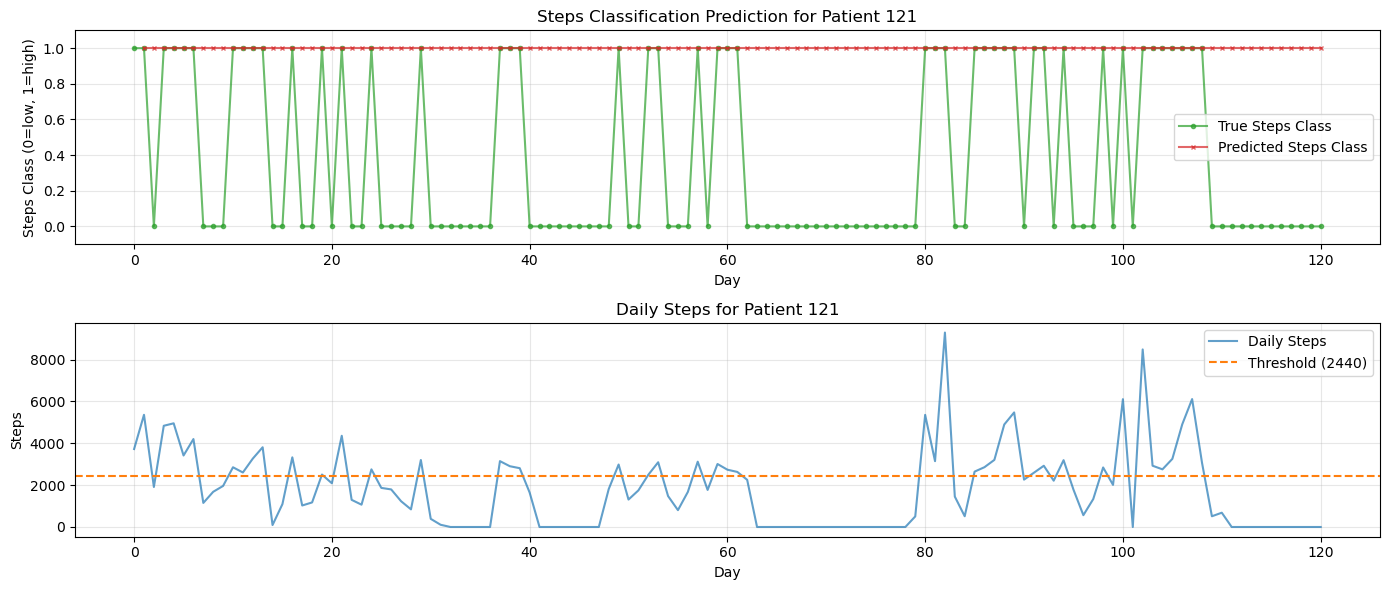

Prediction accuracy for patient 121: 0.367
Compared 120 time steps (from day 1 to day 120)
True steps class 1 rate: 0.367
Predicted steps class 1 rate: 1.000
Steps threshold: 2440.0


In [19]:
# Test inference on a sample patient from validation set
model.eval()

# Get a sample from validation set
val_indices = val_set.indices if hasattr(val_set, 'indices') else list(range(len(val_set)))
sample_idx = val_indices[6]

X_val, Y_val = dataset[sample_idx]  # X_val: (T, D-1) dummy controls, Y_val: (T,) steps target
T_sample = Y_val.shape[0]
ts = torch.arange(1, T_sample + 1)

# Initial state y0 = [target_t0, controls_t0]
y0 = torch.cat([Y_val[0].unsqueeze(0), X_val[0]])

# Roll out predicted trajectory
with torch.no_grad():
    traj_pred = model.solve_for_inference(ts=ts, cs=X_val, y0=y0)  # Returns trajectory
    y_pred = traj_pred[:, 0].long().cpu().numpy()  # predicted steps classes
    y_true = Y_val.long().cpu().numpy()

# The trajectory includes initial state at index 0, so we skip it for comparison
# Compare predictions from time 1 onwards with true values from time 1 onwards
# This ensures both arrays have the same length
y_pred_compare = y_pred[1:]  # Skip initial state
y_true_compare = y_true[1:]  # Skip initial state to match predictions

# Ensure same length (in case of any remaining mismatch)
min_len = min(len(y_pred_compare), len(y_true_compare))
y_pred_compare = y_pred_compare[:min_len]
y_true_compare = y_true_compare[:min_len]

# Plot prediction vs actual
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
# Plot all true values
plt.plot(y_true, label='True Steps Class', marker='o', alpha=0.7, color='tab:green', markersize=3)
# Plot predictions (starting from time 1, so shift x-axis)
pred_x = np.arange(1, len(y_pred_compare) + 1)
plt.plot(pred_x, y_pred_compare, label='Predicted Steps Class', marker='x', alpha=0.7, color='tab:red', markersize=3)
plt.xlabel('Day')
plt.ylabel('Steps Class (0=low, 1=high)')
plt.title(f'Steps Classification Prediction for Patient {sample_idx}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)

# Plot actual steps data for this patient
plt.subplot(2, 1, 2)
patient_steps = steps_values[sample_idx, :]
plt.plot(patient_steps, label='Daily Steps', color='tab:blue', alpha=0.7)
plt.axhline(y=steps_median, color='tab:orange', linestyle='--', label=f'Threshold ({steps_median:.0f})')
plt.xlabel('Day')
plt.ylabel('Steps')
plt.title(f'Daily Steps for Patient {sample_idx}')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate accuracy on aligned predictions
if len(y_pred_compare) > 0 and len(y_true_compare) > 0:
    accuracy = (y_pred_compare == y_true_compare).mean()
    print(f"Prediction accuracy for patient {sample_idx}: {accuracy:.3f}")
    print(f"Compared {len(y_pred_compare)} time steps (from day 1 to day {len(y_pred_compare)})")
    print(f"True steps class 1 rate: {y_true_compare.mean():.3f}")
    print(f"Predicted steps class 1 rate: {y_pred_compare.mean():.3f}")
    print(f"Steps threshold: {steps_median:.1f}")
else:
    print(f"Warning: Could not align predictions and true values for comparison")
    print(f"y_pred shape: {y_pred.shape}, y_true shape: {y_true.shape}")
    print(f"y_pred_compare shape: {y_pred_compare.shape}, y_true_compare shape: {y_true_compare.shape}")


### Reinforce - by hand

also tried in `train_reinforce.py` but got inconsistent results

In [3]:
import numpy as np

# Load the np array from the given file path into a variable
reinforce_data = np.load('/Users/andreilixandru/Downloads/NDEs-for-adherence-main/tensor_Reinforce.npy', allow_pickle=True)

print(reinforce_data.shape)

# Calculate stats for reinforce_data[:, :, 0]
reinforce_data_0 = reinforce_data[:, :, 0]

# Calculate the percentage frequency of each unique value
unique_vals, counts = np.unique(reinforce_data_0, return_counts=True)
total = reinforce_data_0.size

percentages = counts / total * 100

print("Percentage frequency of each unique value in reinforce_data[:, :, 0]:")
for val, pct, cnt in zip(unique_vals, percentages, counts):
    print(f"Value {val}: {pct:.2f}% ({cnt} occurrences)")



(28, 183, 7)
Percentage frequency of each unique value in reinforce_data[:, :, 0]:
Value 0.0: 87.33% (4475 occurrences)
Value 0.16667: 0.02% (1 occurrences)
Value 0.25: 0.55% (28 occurrences)
Value 0.5: 7.38% (378 occurrences)
Value 0.75: 2.50% (128 occurrences)
Value 0.83333: 0.02% (1 occurrences)
Value 1.0: 2.21% (113 occurrences)


In [ ]:
import os

# Optionally choose/print working directory before loading datasets
cwd = os.getcwd()
print(f"Current working directory: {cwd}")
os.chdir('/home/andrei/Desktop/PhD/Carepath')


from clean_ndes import create_reinforce_dataset, get_reinforce_config, AdherencePredictor, train_one_epoch
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
import torch
from clean_ndes.datasets import AdherenceDataset
import random
torch.manual_seed(0) # torch seed for reproducibility

N_RUNS = 3
seeds = [torch.randint(0, 1000000, size=(1,)).item() for _ in range(N_RUNS)]
print(seeds)

N_EPOCHS = 5
TRAIN_SPLIT = 0.8
BATCH_SIZE_VALUE = 4

dataset = AdherenceDataset(reinforce_data, target_as_classes=True)

dataset_size = len(dataset)
train_size = int(TRAIN_SPLIT * dataset_size)
val_size = dataset_size - train_size

train_losses_acrossRuns= []
val_losses_acrossRuns= []


for run_idx in range(N_RUNS):
    random_seed = seeds[run_idx]
    train_set, val_set = random_split(
        dataset,
        [train_size, val_size],
        generator=torch.Generator().manual_seed(random_seed)
    )

    # ------------------ train NDE ------------------
    # Get configuration
    data_raw = np.load("/home/andrei/Desktop/PhD/Carepath/tensor_Reinforce.npy")
    config = get_reinforce_config(data_raw)
    train_loader = DataLoader(train_set, batch_size=BATCH_SIZE_VALUE, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=BATCH_SIZE_VALUE, shuffle=False)

    # Create model with 5 target classes, like in Reinforce
    model = AdherencePredictor(in_dim=config['input_dim'], out_dim=config['output_dim'])

    train_losses_acrossEpochs = []
    val_losses_acrossEpochs = []

    for epoch in range(N_EPOCHS):
        train_lossesThisBarch, val_lossesThisBatch = train_one_epoch(model, train_loader, val_loader)
        train_losses_acrossEpochs.extend(train_lossesThisBarch)
        val_losses_acrossEpochs.extend(val_lossesThisBatch)
    train_losses_acrossRuns.append(train_losses_acrossEpochs)
    val_losses_acrossRuns.append(val_losses_acrossEpochs)

    # ------------------ train Baselines ------------------




Current working directory: /home/andrei/Desktop/PhD/Carepath
[136044, 248239, 714933]
Batch 0: val_loss = 0.3956
Batch 0: train_loss = 1.5805
Batch 1: val_loss = 0.2000
Batch 1: train_loss = 1.4220
Batch 2: val_loss = 0.1451
Batch 2: train_loss = 1.2599
Batch 3: val_loss = 0.0220
Batch 3: train_loss = 1.1184
Batch 4: val_loss = 0.0033
Batch 4: train_loss = 1.0395
Batch 5: val_loss = 0.0022
Batch 5: train_loss = 0.9495
Batch 0: val_loss = 0.0022
Batch 0: train_loss = 0.6445
Batch 1: val_loss = 0.0022
Batch 1: train_loss = 0.4956
Batch 2: val_loss = 0.0022
Batch 2: train_loss = 0.4429
Batch 3: val_loss = 0.0022
Batch 3: train_loss = 0.4920
Batch 4: val_loss = 0.0022
Batch 4: train_loss = 0.5190
Batch 5: val_loss = 0.0022
Batch 5: train_loss = 0.6441
Batch 0: val_loss = 0.0005
Batch 0: train_loss = 0.1891
Batch 1: val_loss = 0.0005
Batch 1: train_loss = 0.1301
Batch 2: val_loss = 0.0005
Batch 2: train_loss = 0.6449
Batch 3: val_loss = 0.0005
Batch 3: train_loss = 0.1172
Batch 4: val_loss 

#### (depricated) get chance level performance 

In [15]:
# get chance level performance

from typing import Any

print("X", np.shape(val_set.dataset[:][0]))
print("y", np.shape(val_set.dataset[:][1]))

print("X", np.shape(train_set.dataset[:][0]))
print("y", np.shape(train_set.dataset[:][1]))

dim0_val_set = val_set.dataset[:][0][:,:,0]

random_seeds = [136044, 248239, 714933]

for random_seed in random_seeds:
    train_set, val_set = random_split(
        dataset,
        [train_size, val_size],
        generator=torch.Generator().manual_seed(random_seed)
    )

    targets_val_set = val_set.dataset[:][1]



    targets_val_set = torch.tensor(targets_val_set).squeeze()
    chance_level_mostFrequent = torch.zeros_like(targets_val_set).squeeze()

    def mean_squared_error(arr1, arr2):
        """
        Calculates mean squared error between two arrays or tensors (same shape).
        Works for both numpy arrays and torch tensors.
        """
        if isinstance(arr1, torch.Tensor):
            arr1 = arr1.float()
            arr2 = arr2.float()
            return torch.mean((arr1 - arr2) ** 2).item()
        else:
            arr1 = np.array(arr1)
            arr2 = np.array(arr2)
            return np.mean((arr1 - arr2) ** 2)

    # Example usage for chance level performance:
    mse_chance = mean_squared_error(chance_level_mostFrequent, targets_val_set)
    print("Chance level MSE:", mse_chance)

X torch.Size([28, 183, 6])
y torch.Size([28, 183])
X torch.Size([28, 183, 6])
y torch.Size([28, 183])
Chance level MSE: 0.022053083404898643
Chance level MSE: 0.022053083404898643
Chance level MSE: 0.022053083404898643


/tmp/ipykernel_14219/868224045.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  targets_val_set = torch.tensor(targets_val_set).squeeze()


(3,)


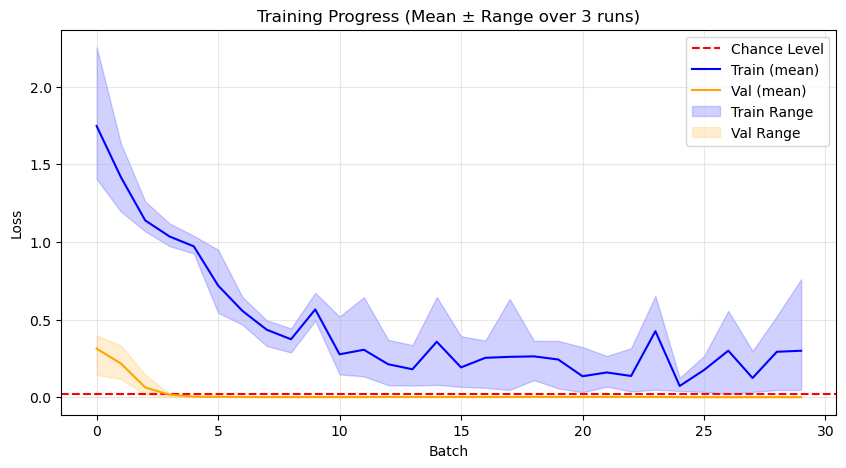

✓ Visualization complete!


In [16]:

import matplotlib.pyplot as plt

import numpy as np

plt.figure(figsize=(10, 5))
plt.axhline(y=mse_chance, color='red', linestyle='--', label='Chance Level')

# Convert to numpy for easier computation
train_arr = np.array(train_losses_acrossRuns)  # shape: (3, n_steps)
val_arr = np.array(val_losses_acrossRuns)      # shape: (3, n_steps)
var_arr_lastBatch = val_arr[:, -1]  # taking performance at last batch for bar plots
print(var_arr_lastBatch.shape)  # should be 3

# Compute mean, min, max across runs at each batch
train_mean = np.mean(train_arr, axis=0)
train_min = np.min(train_arr, axis=0)
train_max = np.max(train_arr, axis=0)

val_mean = np.mean(val_arr, axis=0)
val_min = np.min(val_arr, axis=0)
val_max = np.max(val_arr, axis=0)

x_batches = np.arange(len(train_mean))

# Plot mean lines
plt.plot(x_batches, train_mean, label='Train (mean)', color='blue')
plt.plot(x_batches, val_mean, label='Val (mean)', color='orange')

# Confidence intervals as min-max band
plt.fill_between(x_batches, train_min, train_max, color='blue', alpha=0.18, label='Train Range')
plt.fill_between(x_batches, val_min, val_max, color='orange', alpha=0.18, label='Val Range')

plt.xlabel('Batch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Progress (Mean ± Range over 3 runs)')
plt.grid(True, alpha=0.3)
plt.show()

print("✓ Visualization complete!")

#### compare with gold regressor

In [1]:
import os

# Optionally choose/print working directory before loading datasets
cwd = os.getcwd()
print(f"Current working directory: {cwd}")
os.chdir('/Users/andreilixandru/Downloads/NDEs-for-adherence-main')


from clean_ndes import create_reinforce_dataset, get_reinforce_config, AdherencePredictor, train_one_epoch
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
import torch
from clean_ndes.datasets import AdherenceDataset
import random
from typing import Any
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# XGBoost import (install xgboost if not present)
try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    print("XGBoost not installed, skipping XGBoost comparison.")
    xgb_available = False

torch.manual_seed(0) # torch seed for reproducibility

N_RUNS = 3
seeds = [torch.randint(0, 1000000, size=(1,)).item() for _ in range(N_RUNS)]
print(seeds)

N_EPOCHS = 5
TRAIN_SPLIT = 0.8
BATCH_SIZE_VALUE = 4

dataset = AdherenceDataset(reinforce_data, target_as_classes=True)

dataset_size = len(dataset)
train_size = int(TRAIN_SPLIT * dataset_size)
val_size = dataset_size - train_size

print("train_size", train_size)
print("val_size", val_size)

train_losses_acrossRuns= []
val_losses_acrossRuns= []

# ------------ for baseline algorithms -----------------------
N = reinforce_data.shape[0]
T = reinforce_data.shape[1]
D = reinforce_data.shape[2]

# Define models and their hyperparameter grids for tuning
model_configs = [
    {
        "name": "Linear Regression",
        "estimator": LinearRegression(),
        "param_grid": {}  # No hyperparameters to tune for basic LinearRegression
    },
    {
        "name": "Ridge Regression",
        "estimator": Ridge(),
        "param_grid": {"alpha": [0.01, 0.1, 1.0, 10.0, 100.0]}
    },
    {
        "name": "Lasso Regression",
        "estimator": Lasso(max_iter=10000),
        "param_grid": {"alpha": [0.01, 0.1, 1.0, 10.0, 100.0]}
    },
    {
        "name": "Random Forest",
        "estimator": RandomForestRegressor(random_state=42, n_jobs=-1),
        "param_grid": {
            "n_estimators": [50, 100],
            "max_depth": [3, 5, 10, None]
        }
    }
]
if xgb_available:
    model_configs.append({
        "name": "XGBoost",
        "estimator": XGBRegressor(random_state=42, n_jobs=-1, verbosity=0),
        "param_grid": {
            "n_estimators": [50, 100],
            "max_depth": [3, 5, 10],
            "learning_rate": [0.01, 0.1, 0.3]
        }
    })

# Store results for each model (pre-allocate for easier aggregation later)
results = {
    cfg["name"]: {
        "mse_model_list": [],
        "mse_baseline_list": [],
        "best_params_list": []
    }
    for cfg in model_configs
}

#-------------------------------------------------
previous_train_set = []
for run_idx in range(N_RUNS):
    print("========= Run ", run_idx+1, " ============")
    random_seed = seeds[run_idx]
    train_set, val_set = random_split(
        dataset,
        [train_size, val_size],
        generator=torch.Generator().manual_seed(random_seed)
    )
    if train_set == previous_train_set:
        print("train_set is the same as previous_train_set")
    else:
        print("train_set is different from previous_train_set")
    
    previous_train_set = train_set



    print("train_set labels shape", train_set[:][1].shape)
    print("val_set labels shape", val_set[:][1].shape)

    # ------------------ train NDE ------------------
    # Get configuration
    data_raw = np.load('/Users/andreilixandru/Downloads/NDEs-for-adherence-main/tensor_Reinforce.npy', allow_pickle=True)
    config = get_reinforce_config(data_raw)
    train_loader = DataLoader(train_set, batch_size=BATCH_SIZE_VALUE, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=BATCH_SIZE_VALUE, shuffle=False)

    # Create model with 5 target classes, like in Reinforce
    model = AdherencePredictor(in_dim=config['input_dim'], out_dim=config['output_dim'])

    train_losses_acrossEpochs = []
    val_losses_acrossEpochs = []

    for epoch in range(N_EPOCHS):
        train_lossesThisBarch, val_lossesThisBatch = train_one_epoch(model, train_loader, val_loader)
        train_losses_acrossEpochs.extend(train_lossesThisBarch)
        val_losses_acrossEpochs.extend(val_lossesThisBatch)
    train_losses_acrossRuns.append(train_losses_acrossEpochs)
    val_losses_acrossRuns.append(val_losses_acrossEpochs)

    # ------------------ train Baseline algorithms ------------------
    X_train = np.array(train_set[:][0]).reshape(-1, D-1)
    y_train = np.array(train_set[:][1]).reshape(-1).astype(float)
    X_test = np.array(val_set[:][0]).reshape(-1, D-1)
    y_test = np.array(val_set[:][1]).reshape(-1).astype(float)

    for model_cfg in model_configs:
        model_name = model_cfg["name"]
        print(f"\nModel: {model_name}")

        # Hyperparameter tuning if grid is not empty
        if model_cfg["param_grid"]:
            grid = GridSearchCV(
                model_cfg["estimator"],
                model_cfg["param_grid"],
                scoring="neg_mean_squared_error",
                cv=3,
                n_jobs=-1
            )
            grid.fit(X_train, y_train)
            reg = grid.best_estimator_
            best_params = grid.best_params_
        else:
            reg = model_cfg["estimator"]
            reg.fit(X_train, y_train)
            best_params = {}

        y_pred = reg.predict(X_test)
        mse_model = mean_squared_error(y_test, y_pred)
        baseline_pred = np.full_like(y_test, fill_value=np.mean(y_train))
        mse_baseline = mean_squared_error(y_test, baseline_pred)

        results[model_name]["mse_model_list"].append(mse_model)
        results[model_name]["mse_baseline_list"].append(mse_baseline)
        results[model_name]["best_params_list"].append(best_params)

        print(f"  Mean Squared Error (Model): {mse_model:.4f}")
        print(f"  Mean Squared Error (Baseline - mean Y in train set): {mse_baseline:.4f}")
        if best_params:
            print(f"  Best hyperparameters: {best_params}")
        if mse_model < mse_baseline:
            print("  Model outperforms baseline.")
        else:
            print("  Model does not outperform baseline.")


        
methods = [cfg["name"] for cfg in model_configs] + ["Baseline"]
means = [np.mean(results[m]["mse_model_list"]) for m in methods if m != "Baseline"]
stds = [np.std(results[m]["mse_model_list"]) for m in methods if m != "Baseline"]
mins = [np.min(results[m]["mse_model_list"]) for m in methods if m != "Baseline"]
maxs = [np.max(results[m]["mse_model_list"]) for m in methods if m != "Baseline"]

# For baseline, use the first model's baseline list (they are all the same)
baseline_mses = list[dict[str, list]](results.values())[0]["mse_baseline_list"]
baseline_means = np.mean(baseline_mses)
baseline_stds = np.std(baseline_mses)
baseline_mins = np.min(baseline_mses)
baseline_maxs = np.max(baseline_mses)

means.append(baseline_means)
stds.append(baseline_stds)
mins.append(baseline_mins)
maxs.append(baseline_maxs)


Current working directory: /Users/andreilixandru/Downloads/NDEs-for-adherence-main/clean_ndes
XGBoost not installed, skipping XGBoost comparison.
[136044, 248239, 714933]


NameError: name 'reinforce_data' is not defined

In [4]:
import os

# Optionally choose/print working directory before loading datasets
cwd = os.getcwd()
print(f"Current working directory: {cwd}")
os.chdir('/Users/andreilixandru/Downloads/NDEs-for-adherence-main')


from clean_ndes import create_reinforce_dataset, get_reinforce_config, AdherencePredictor, train_one_epoch
from clean_ndes.data_utils import classes_to_values
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
import torch
from clean_ndes.datasets import AdherenceDataset
import random
from typing import Any
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# XGBoost import (install xgboost if not present)
try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    print("XGBoost not installed, skipping XGBoost comparison.")
    xgb_available = False

torch.manual_seed(0) # torch seed for reproducibility

N_RUNS = 3
seeds = [torch.randint(0, 1000000, size=(1,)).item() for _ in range(N_RUNS)]
print(seeds)

N_EPOCHS = 5
TRAIN_SPLIT = 0.8
BATCH_SIZE_VALUE = 4

dataset = AdherenceDataset(reinforce_data, target_as_classes=True)

dataset_size = len(dataset)
train_size = int(TRAIN_SPLIT * dataset_size)
val_size = dataset_size - train_size

print("train_size", train_size)
print("val_size", val_size)

train_losses_acrossRuns= []
val_losses_acrossRuns= []

# ------------ for baseline algorithms -----------------------
N = reinforce_data.shape[0]
T = reinforce_data.shape[1]
D = reinforce_data.shape[2]

# Define models and their hyperparameter grids for tuning
model_configs = [
    {
        "name": "Linear Regression",
        "estimator": LinearRegression(),
        "param_grid": {}  # No hyperparameters to tune for basic LinearRegression
    },
    {
        "name": "Ridge Regression",
        "estimator": Ridge(),
        "param_grid": {"alpha": [0.01, 0.1, 1.0, 10.0, 100.0]}
    },
    {
        "name": "Lasso Regression",
        "estimator": Lasso(max_iter=10000),
        "param_grid": {"alpha": [0.01, 0.1, 1.0, 10.0, 100.0]}
    },
    {
        "name": "Random Forest",
        "estimator": RandomForestRegressor(random_state=42, n_jobs=-1),
        "param_grid": {
            "n_estimators": [50, 100],
            "max_depth": [3, 5, 10, None]
        }
    }
]
if xgb_available:
    model_configs.append({
        "name": "XGBoost",
        "estimator": XGBRegressor(random_state=42, n_jobs=-1, verbosity=0),
        "param_grid": {
            "n_estimators": [50, 100],
            "max_depth": [3, 5, 10],
            "learning_rate": [0.01, 0.1, 0.3]
        }
    })

# Store results for each model (pre-allocate for easier aggregation later)
results = {
    cfg["name"]: {
        "mse_model_list": [],
        "mse_baseline_list": [],
        "best_params_list": []
    }
    for cfg in model_configs
}

# Add Majority Class baseline
results["Majority Class"] = {
    "mse_model_list": [],
    "mse_baseline_list": [],
    "best_params_list": []
}

#-------------------------------------------------
previous_train_set = []
for run_idx in range(N_RUNS):
    print("========= Run ", run_idx+1, " ============")
    random_seed = seeds[run_idx]
    train_set, val_set = random_split(
        dataset,
        [train_size, val_size],
        generator=torch.Generator().manual_seed(random_seed)
    )
    if train_set == previous_train_set:
        print("train_set is the same as previous_train_set")
    else:
        print("train_set is different from previous_train_set")
    
    previous_train_set = train_set



    print("train_set labels shape", train_set[:][1].shape)
    print("val_set labels shape", val_set[:][1].shape)

    # ------------------ train NDE ------------------
    # Get configuration
    data_raw = np.load('/Users/andreilixandru/Downloads/NDEs-for-adherence-main/tensor_Reinforce.npy', allow_pickle=True)
    config = get_reinforce_config(data_raw)
    train_loader = DataLoader(train_set, batch_size=BATCH_SIZE_VALUE, shuffle=True)
    val_loader = DataLoader(val_set, batch_size=BATCH_SIZE_VALUE, shuffle=False)

    # Create model with 5 target classes, like in Reinforce
    model = AdherencePredictor(in_dim=config['input_dim'], out_dim=config['output_dim'])

    train_losses_acrossEpochs = []
    val_losses_acrossEpochs = []

    for epoch in range(N_EPOCHS):
        train_lossesThisBarch, val_lossesThisBatch = train_one_epoch(model, train_loader, val_loader)
        train_losses_acrossEpochs.extend(train_lossesThisBarch)
        val_losses_acrossEpochs.extend(val_lossesThisBatch)
    train_losses_acrossRuns.append(train_losses_acrossEpochs)
    val_losses_acrossRuns.append(val_losses_acrossEpochs)

    # ------------------ train Baseline algorithms ------------------
    X_train = np.array(train_set[:][0]).reshape(-1, D-1)
    y_train = np.array(train_set[:][1]).reshape(-1).astype(float)
    X_test = np.array(val_set[:][0]).reshape(-1, D-1)
    y_test = np.array(val_set[:][1]).reshape(-1).astype(float)

    for model_cfg in model_configs:
        model_name = model_cfg["name"]
        print(f"\nModel: {model_name}")

        # Hyperparameter tuning if grid is not empty
        if model_cfg["param_grid"]:
            grid = GridSearchCV(
                model_cfg["estimator"],
                model_cfg["param_grid"],
                scoring="neg_mean_squared_error",
                cv=3,
                n_jobs=-1
            )
            grid.fit(X_train, y_train)
            reg = grid.best_estimator_
            best_params = grid.best_params_
        else:
            reg = model_cfg["estimator"]
            reg.fit(X_train, y_train)
            best_params = {}

        y_pred = reg.predict(X_test)
        mse_model = mean_squared_error(y_test, y_pred)
        baseline_pred = np.full_like(y_test, fill_value=np.mean(y_train))
        mse_baseline = mean_squared_error(y_test, baseline_pred)

        results[model_name]["mse_model_list"].append(mse_model)
        results[model_name]["mse_baseline_list"].append(mse_baseline)
        results[model_name]["best_params_list"].append(best_params)

        print(f"  Mean Squared Error (Model): {mse_model:.4f}")
        print(f"  Mean Squared Error (Baseline - mean Y in train set): {mse_baseline:.4f}")
        if best_params:
            print(f"  Best hyperparameters: {best_params}")
        if mse_model < mse_baseline:
            print("  Model outperforms baseline.")
        else:
            print("  Model does not outperform baseline.")

    # ------------------ Majority Class Baseline ------------------
    # Get class indices from training set (y_train is already class indices when target_as_classes=True)
    y_train_classes = np.array(train_set[:][1]).reshape(-1).astype(int)
    # Find majority class
    unique_classes, class_counts = np.unique(y_train_classes, return_counts=True)
    majority_class = unique_classes[np.argmax(class_counts)]
    
    # Predict majority class for all test samples
    y_test_classes = np.array(val_set[:][1]).reshape(-1).astype(int)
    y_pred_majority_class = np.full_like(y_test_classes, fill_value=majority_class)
    
    # Convert to continuous values for MSE calculation
    y_test_values = classes_to_values(y_test_classes)
    y_pred_majority_values = classes_to_values(y_pred_majority_class)
    
    # For baseline comparison, use mean of training values (convert classes to values first)
    y_train_values = classes_to_values(y_train_classes)
    mse_majority_class = mean_squared_error(y_test_values, y_pred_majority_values)
    baseline_pred = np.full_like(y_test_values, fill_value=np.mean(y_train_values))
    mse_baseline = mean_squared_error(y_test_values, baseline_pred)
    
    results["Majority Class"]["mse_model_list"].append(mse_majority_class)
    results["Majority Class"]["mse_baseline_list"].append(mse_baseline)
    results["Majority Class"]["best_params_list"].append({})
    
    print(f"\nModel: Majority Class")
    print(f"  Majority class: {majority_class}")
    print(f"  Mean Squared Error (Model): {mse_majority_class:.4f}")
    print(f"  Mean Squared Error (Baseline - mean Y in train set): {mse_baseline:.4f}")
    if mse_majority_class < mse_baseline:
        print("  Model outperforms baseline.")
    else:
        print("  Model does not outperform baseline.")


        
methods = [cfg["name"] for cfg in model_configs] + ["Majority Class", "Baseline"]
means = [np.mean(results[m]["mse_model_list"]) for m in methods if m != "Baseline"]
stds = [np.std(results[m]["mse_model_list"]) for m in methods if m != "Baseline"]
mins = [np.min(results[m]["mse_model_list"]) for m in methods if m != "Baseline"]
maxs = [np.max(results[m]["mse_model_list"]) for m in methods if m != "Baseline"]

# For baseline, use the first model's baseline list (they are all the same)
baseline_mses = list[dict[str, list]](results.values())[0]["mse_baseline_list"]
baseline_means = np.mean(baseline_mses)
baseline_stds = np.std(baseline_mses)
baseline_mins = np.min(baseline_mses)
baseline_maxs = np.max(baseline_mses)

means.append(baseline_means)
stds.append(baseline_stds)
mins.append(baseline_mins)
maxs.append(baseline_maxs)


Current working directory: /Users/andreilixandru/Downloads/NDEs-for-adherence-main
XGBoost not installed, skipping XGBoost comparison.
[136044, 248239, 714933]
train_size 22
val_size 6
========= Run  1  ============
train_set is different from previous_train_set
train_set labels shape torch.Size([22, 183])
val_set labels shape torch.Size([6, 183])
Batch 0: val_loss = 9.7280
Batch 0: train_loss = 1.5805
Batch 1: val_loss = 7.4451
Batch 1: train_loss = 1.4220
Batch 2: val_loss = 5.3929
Batch 2: train_loss = 1.2599
Batch 3: val_loss = 0.7967
Batch 3: train_loss = 1.1184
Batch 4: val_loss = 0.0495
Batch 4: train_loss = 1.0395
Batch 5: val_loss = 0.0055
Batch 5: train_loss = 0.9495
Batch 0: val_loss = 0.0055
Batch 0: train_loss = 0.6445
Batch 1: val_loss = 0.0055
Batch 1: train_loss = 0.5160
Batch 2: val_loss = 0.0055
Batch 2: train_loss = 0.4746
Batch 3: val_loss = 0.0055
Batch 3: train_loss = 0.5132
Batch 4: val_loss = 0.0055
Batch 4: train_loss = 0.5493
Batch 5: val_loss = 0.0055
Batch 5

/var/folders/c9/vgn3b11s26l537zxc9c44bym0000gp/T/ipykernel_5063/217606309.py:156: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  X_train = np.array(train_set[:][0]).reshape(-1, D-1)
/var/folders/c9/vgn3b11s26l537zxc9c44bym0000gp/T/ipykernel_5063/217606309.py:157: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y_train = np.array(train_set[:][1]).reshape(-1).astype(float)
/var/folders/c9/vgn3b11s26l537zxc9c44bym0000gp/T/ipykernel_5063/217606309.py:158: DeprecationWarning: __arr

  Mean Squared Error (Model): 0.0037
  Mean Squared Error (Baseline - mean Y in train set): 0.0033
  Best hyperparameters: {'alpha': 100.0}
  Model does not outperform baseline.

Model: Lasso Regression
  Mean Squared Error (Model): 0.0033
  Mean Squared Error (Baseline - mean Y in train set): 0.0033
  Best hyperparameters: {'alpha': 0.1}
  Model outperforms baseline.

Model: Random Forest
  Mean Squared Error (Model): 0.0039
  Mean Squared Error (Baseline - mean Y in train set): 0.0033
  Best hyperparameters: {'max_depth': 3, 'n_estimators': 50}
  Model does not outperform baseline.

Model: Majority Class
  Majority class: 0
  Mean Squared Error (Model): 0.0002
  Mean Squared Error (Baseline - mean Y in train set): 0.0002
  Model outperforms baseline.
========= Run  2  ============
train_set is different from previous_train_set
train_set labels shape torch.Size([22, 183])
val_set labels shape torch.Size([6, 183])
Batch 0: val_loss = 2.8407
Batch 0: train_loss = 1.4042
Batch 1: val_los

/var/folders/c9/vgn3b11s26l537zxc9c44bym0000gp/T/ipykernel_5063/217606309.py:202: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y_train_classes = np.array(train_set[:][1]).reshape(-1).astype(int)
/var/folders/c9/vgn3b11s26l537zxc9c44bym0000gp/T/ipykernel_5063/217606309.py:208: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y_test_classes = np.array(val_set[:][1]).reshape(-1).astype(int)


Batch 2: train_loss = 1.0864
Batch 3: val_loss = 0.0522
Batch 3: train_loss = 1.0135
Batch 4: val_loss = 0.0027
Batch 4: train_loss = 0.9494
Batch 5: val_loss = 0.0027
Batch 5: train_loss = 0.5438
Batch 0: val_loss = 0.0027
Batch 0: train_loss = 0.4672
Batch 1: val_loss = 0.0027
Batch 1: train_loss = 0.4861
Batch 2: val_loss = 0.0027
Batch 2: train_loss = 0.3047
Batch 3: val_loss = 0.0027
Batch 3: train_loss = 0.6832
Batch 4: val_loss = 0.0027
Batch 4: train_loss = 0.1817
Batch 5: val_loss = 0.0027
Batch 5: train_loss = 0.1568
Batch 0: val_loss = 0.0124
Batch 0: train_loss = 0.3930
Batch 1: val_loss = 0.0124
Batch 1: train_loss = 0.3354
Batch 2: val_loss = 0.0124
Batch 2: train_loss = 0.0954
Batch 3: val_loss = 0.0124
Batch 3: train_loss = 0.0796
Batch 4: val_loss = 0.0124
Batch 4: train_loss = 0.3395
Batch 5: val_loss = 0.0124
Batch 5: train_loss = 0.1074
Batch 0: val_loss = 0.0027
Batch 0: train_loss = 0.3312
Batch 1: val_loss = 0.0027
Batch 1: train_loss = 0.0522
Batch 2: val_loss =

/var/folders/c9/vgn3b11s26l537zxc9c44bym0000gp/T/ipykernel_5063/217606309.py:156: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  X_train = np.array(train_set[:][0]).reshape(-1, D-1)
/var/folders/c9/vgn3b11s26l537zxc9c44bym0000gp/T/ipykernel_5063/217606309.py:157: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y_train = np.array(train_set[:][1]).reshape(-1).astype(float)
/var/folders/c9/vgn3b11s26l537zxc9c44bym0000gp/T/ipykernel_5063/217606309.py:158: DeprecationWarning: __arr

  Mean Squared Error (Model): 0.0101
  Mean Squared Error (Baseline - mean Y in train set): 0.0093
  Best hyperparameters: {'max_depth': 3, 'n_estimators': 100}
  Model does not outperform baseline.

Model: Majority Class
  Majority class: 0
  Mean Squared Error (Model): 0.0006
  Mean Squared Error (Baseline - mean Y in train set): 0.0006
  Model outperforms baseline.
========= Run  3  ============
train_set is different from previous_train_set
train_set labels shape torch.Size([22, 183])
val_set labels shape torch.Size([6, 183])
Batch 0: val_loss = 9.0137
Batch 0: train_loss = 2.2532
Batch 1: val_loss = 6.4451
Batch 1: train_loss = 1.6322
Batch 2: val_loss = 0.1786


/var/folders/c9/vgn3b11s26l537zxc9c44bym0000gp/T/ipykernel_5063/217606309.py:202: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y_train_classes = np.array(train_set[:][1]).reshape(-1).astype(int)
/var/folders/c9/vgn3b11s26l537zxc9c44bym0000gp/T/ipykernel_5063/217606309.py:208: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y_test_classes = np.array(val_set[:][1]).reshape(-1).astype(int)


Batch 2: train_loss = 1.0683
Batch 3: val_loss = 0.0797
Batch 3: train_loss = 0.9727
Batch 4: val_loss = 0.0165
Batch 4: train_loss = 0.9251
Batch 5: val_loss = 0.0165
Batch 5: train_loss = 0.6640
Batch 0: val_loss = 0.0247
Batch 0: train_loss = 0.5563
Batch 1: val_loss = 0.0000
Batch 1: train_loss = 0.3537
Batch 2: val_loss = 0.0000
Batch 2: train_loss = 0.4171
Batch 3: val_loss = 0.0000
Batch 3: train_loss = 0.5697
Batch 4: val_loss = 0.0000
Batch 4: train_loss = 0.1938
Batch 5: val_loss = 0.0000
Batch 5: train_loss = 0.1903
Batch 0: val_loss = 0.0000
Batch 0: train_loss = 0.1182
Batch 1: val_loss = 0.0000
Batch 1: train_loss = 0.1134
Batch 2: val_loss = 0.0000
Batch 2: train_loss = 0.3301
Batch 3: val_loss = 0.0000
Batch 3: train_loss = 0.4297
Batch 4: val_loss = 0.0000
Batch 4: train_loss = 0.0875
Batch 5: val_loss = 0.0000
Batch 5: train_loss = 0.5944
Batch 0: val_loss = 0.0137
Batch 0: train_loss = 0.1303
Batch 1: val_loss = 0.0137
Batch 1: train_loss = 0.3542
Batch 2: val_loss =

/var/folders/c9/vgn3b11s26l537zxc9c44bym0000gp/T/ipykernel_5063/217606309.py:156: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  X_train = np.array(train_set[:][0]).reshape(-1, D-1)
/var/folders/c9/vgn3b11s26l537zxc9c44bym0000gp/T/ipykernel_5063/217606309.py:157: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y_train = np.array(train_set[:][1]).reshape(-1).astype(float)
/var/folders/c9/vgn3b11s26l537zxc9c44bym0000gp/T/ipykernel_5063/217606309.py:158: DeprecationWarning: __arr

  Mean Squared Error (Model): 0.0052
  Mean Squared Error (Baseline - mean Y in train set): 0.0050
  Best hyperparameters: {'max_depth': 3, 'n_estimators': 100}
  Model does not outperform baseline.

Model: Majority Class
  Majority class: 0
  Mean Squared Error (Model): 0.0003
  Mean Squared Error (Baseline - mean Y in train set): 0.0003
  Model outperforms baseline.


/var/folders/c9/vgn3b11s26l537zxc9c44bym0000gp/T/ipykernel_5063/217606309.py:202: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y_train_classes = np.array(train_set[:][1]).reshape(-1).astype(int)
/var/folders/c9/vgn3b11s26l537zxc9c44bym0000gp/T/ipykernel_5063/217606309.py:208: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y_test_classes = np.array(val_set[:][1]).reshape(-1).astype(int)


In [5]:
# ! run only once; if you run more, rerun cell above
methods.append("NDE (ours)")
val_arr = np.array(val_losses_acrossRuns)      # shape: (3, n_steps)
var_arr_lastBatch = val_arr[:, -1]  # taking performance at last batch for bar plots
# Add NDE statistics from var_arr_lastBatch
nde_mses = np.array(var_arr_lastBatch)
nde_mean = np.mean(nde_mses)
nde_std  = np.std(nde_mses)
nde_min  = np.min(nde_mses)
nde_max  = np.max(nde_mses)
means.append(nde_mean)
stds.append(nde_std)
mins.append(nde_min)
maxs.append(nde_max)

In [16]:
print(len(var_arr_lastBatch))

30


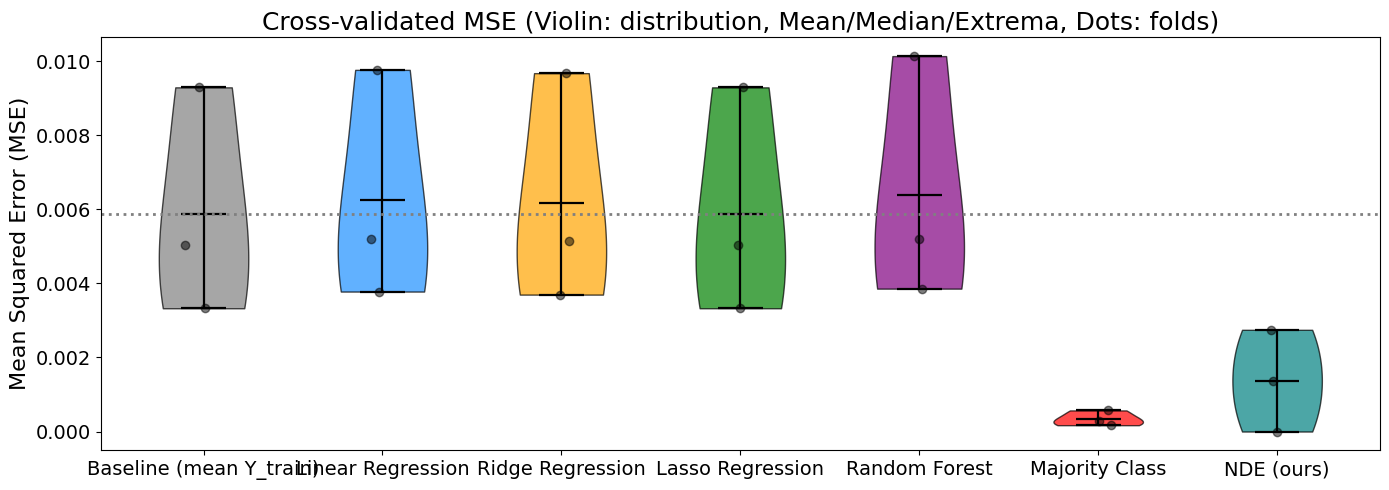

In [ ]:
# Set up wider figure
fig, ax = plt.subplots(figsize=(14, 5))

# Update Baseline label for xticks
methods_for_xticks = [m if m != "Baseline" else "Baseline (mean Y_train)" for m in methods]

# ---- Reorder so that Baseline is first ----
# Find the index for Baseline
baseline_idx = methods.index("Baseline")

# Prepare tuples of all data
bars_data = list(zip(
    methods,
    methods_for_xticks,
    means,
    stds,
    mins,
    maxs
))

# Move Baseline to the front
bars_data = [bars_data[baseline_idx]] + bars_data[:baseline_idx] + bars_data[baseline_idx+1:]

# Unpack
ordered_methods, ordered_methods_for_xticks, ordered_means, ordered_stds, ordered_mins, ordered_maxs = zip(*bars_data)

# For NDE and Baseline, adjust the mse_lists
mse_list_map = {}
for m in ordered_methods:
    if m == "NDE (ours)":
        mse_list_map[m] = nde_mses
    elif m == "Baseline":
        mse_list_map[m] = baseline_mses
    else:
        mse_list_map[m] = results[m]["mse_model_list"]

# Collect data for violin plot: Each element is a list of MSEs for each method in order
mse_lists_ordered = [mse_list_map[m] for m in ordered_methods]

# Violin plot
parts = ax.violinplot(
    mse_lists_ordered,
    positions=np.arange(len(ordered_methods_for_xticks)),
    showmeans=True,
    showmedians=False,
    showextrema=True
)

# Custom coloring for violins (optional; can remove for default look)
violin_colors = ['gray', 'dodgerblue', 'orange', 'green', 'purple', 'red', 'teal']
for i, pc in enumerate(parts['bodies']):
    color = violin_colors[i % len(violin_colors)]
    pc.set_facecolor(color)
    pc.set_alpha(0.7)
    pc.set_edgecolor('black')

for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
    vp = parts.get(partname)
    if vp is not None:
        vp.set_edgecolor('black')
        vp.set_linewidth(1.6)

# Jitter scatter points for each method
for i, mse_list in enumerate(mse_lists_ordered):
    xvals = np.random.normal(loc=i, scale=0.05, size=len(mse_list))
    ax.scatter(xvals, mse_list, color='k', alpha=0.5, zorder=10, label='_nolegend_')

# Draw horizontal line at baseline mean
ax.axhline(baseline_means, color='gray', linestyle=':', linewidth=2, label='Baseline Mean')
ax.axhline(baseline_means, color='red', linestyle=':', linewidth=2, label='majority class mean')


# Labeling
ax.set_ylabel("Mean Squared Error (MSE)", fontsize=16)
ax.set_title("Cross-validated MSE (Violin: distribution, Mean/Median/Extrema, Dots: folds)", fontsize=18)
ax.set_xticks(np.arange(len(ordered_methods_for_xticks)))
ax.set_xticklabels(ordered_methods_for_xticks, fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend().set_visible(False)
plt.tight_layout()
plt.show()


### NDEs vs LLMs

llamma 70B

In [1]:
import transformers
import torch

model_id = "meta-llama/Llama-3.3-70B-Instruct"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    device_map="auto",
)

messages = [
    {"role": "system", "content": "You are a pirate chatbot who always responds in pirate speak!"},
    {"role": "user", "content": "Who are you?"},
]

outputs = pipeline(
    messages,
    max_new_tokens=256,
)
print(outputs[0]["generated_text"][-1])



/opt/miniconda3/envs/carepath/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Llama-3.3-70B-Instruct.
401 Client Error. (Request ID: Root=1-69246f9b-1a92db0608aaabca3e6decd0;aef17aee-b1a1-4c4c-805f-82cb0cba2d64)

Cannot access gated repo for url https://huggingface.co/meta-llama/Llama-3.3-70B-Instruct/resolve/main/config.json.
Access to model meta-llama/Llama-3.3-70B-Instruct is restricted. You must have access to it and be authenticated to access it. Please log in.

flan t5 0.8B

In [1]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-large")
model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-large")

input_text = "translate English to German: How old are you?"
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0]))




/opt/miniconda3/envs/carepath/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


<pad> Wie alte sind Sie?</s>


In [18]:
!pip install transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 27.0 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 15.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 26.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13/13 [transformers] [transformers]ub]
